<a href="https://colab.research.google.com/github/nasirbashak/Plant-the-future/blob/master/Traffic_Data_Creation_using_1D_Perlin_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tf-nightly-2.0-preview
!pip install tensorflow==2.1.0
!pip install noise


     |████████████████████████████████| 421.8MB 23kB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
     |████████████████████████████████| 3.9MB 39.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 133kB 3.4MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp36-cp36m-linux_x86_64.whl size=62464 sha256=6f28ca93a16916c07774bcc238ac3036c61d5d6c8ce743cdef929b5f638a8bb0
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise


### Importing Packages

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import noise
import pandas as pd

print(tf.__version__)

2.1.0


### Helper function to plot data

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

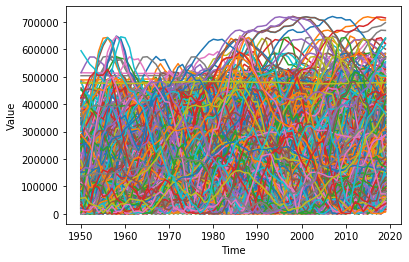

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 256
  span = 5.0
  octaves = 20
  base = 25
  slope = .005
  amplitude = 10000

  values = []
  n= 0


  while n != rows:
    if printLog:
      print("Row ",n+1)
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(startYear,endYear+1):
      x = float(i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      #print(x,y, end= '\n')
      time.append(int(i))
      value.append(int(np.abs(y)*100))
      base*=slope

    #print(len(value))
    if value[0] > value[-1]:
      if printLog:
        print("Rejected\n")
    else:
      if printLog:
        print("Accepted\n")
      n+=1
      if plotGraph:
        #plt.plot(time, value)
        plot_series(time,value)
        #print(time[0],time[-1])
        #print(value[0],value[-1])

      values.append(np.array(value))



  return np.array(values)

    
    #print(time)
    #print(value)

data = createData(1000,startYear=1950,endYear=2019,plotGraph=True,printLog=False)


In [0]:
data.shape

(1000, 70)

In [0]:
years = list(range(1950,2020))
years = list(map(str,years))
years[:20]

['1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969']

In [0]:
 d= pd.DataFrame(data,columns = years)
 d.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,150403,182655,208904,239936,259450,278091,299020,297100,286809,246121,205695,191284,176929,168412,150050,129941,96688,67916,56928,52585,58217,50858,59579,49217,28646,32376,52123,53698,55264,53876,52620,42978,33503,14361,41981,44583,41128,33388,37143,49098,62262,89940,129862,158811,193117,206279,195761,193889,197014,178351,177136,172524,175826,177172,187702,197876,188720,184930,176246,167307,184657,212086,249144,285684,299955,307400,281048,306884,285234,249815
1,76958,34511,10175,17840,3110,4809,22907,3940,28213,106054,188835,243715,265645,330122,410408,457375,457198,439433,380340,365049,359963,305433,282811,357516,411813,419873,462643,464720,332320,206955,104804,20150,159063,278800,377236,431964,408282,347630,357313,311203,269980,235530,259209,349292,409317,454281,503172,447574,346372,318914,300665,304878,264449,128261,52602,33358,45334,25578,34104,25991,61489,51700,55235,100951,78233,116064,181613,107099,124659,184114
2,31735,49601,35689,1721,36185,76196,90421,96130,67988,32638,4656,43026,52682,20355,5778,27165,76165,118544,145881,147872,161806,154259,149530,177686,196856,218599,243521,210525,157432,79936,5411,25700,34799,5572,60942,7184,31806,33101,16397,26848,4690,1941,62087,46397,2727,54982,66273,65864,881,62222,61557,28507,13990,19309,32462,23265,20430,4653,18021,7525,6288,17255,1213,535,38775,104211,86714,48103,398,41483
3,21750,1660,3071,1471,7587,9653,21953,15856,16401,14954,54558,90118,143887,137989,149867,158105,149317,151354,162720,177621,213969,252876,289905,272266,310265,313622,335361,352662,367286,396994,398262,409545,428093,446762,469919,468878,518675,545625,534823,508839,499924,490188,477452,452229,426874,384093,327397,285222,256686,229930,182209,131581,121284,134772,133356,123365,130122,111925,102477,80822,44795,22914,12666,10953,51031,67753,97752,113275,149623,137284
4,115679,138678,179910,282093,364453,379865,376419,382417,353360,326951,300109,241991,227385,136653,115719,38861,4173,9202,334,19166,75399,125420,129184,111092,44933,19474,99334,138748,160886,193011,138202,79669,44427,14639,14044,34016,5421,24103,45724,12400,36931,41936,8359,79861,102983,77201,97860,49274,76773,127261,130839,132539,140077,109508,40169,152676,183945,170523,155457,114129,68549,27033,30036,71258,131684,174191,232516,275704,326658,376725


In [0]:
d.to_csv("TrafficDensity1950to2019.csv")

In [0]:
d.describe()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,93816.827000,97444.770000,101803.490000,107464.027000,113701.402000,119658.943000,124090.359000,127898.429000,130136.104000,131404.570000,132375.171000,133877.293000,134629.539000,136844.961000,139500.651000,142591.000000,145393.297000,146558.591000,148195.397000,149436.296000,151069.708000,151290.655000,151573.081000,150678.633000,150742.468000,150720.432000,152826.092000,152828.573000,150449.845000,149549.360000,149378.713000,149890.9890,151130.981000,154287.147000,157716.678000,160108.616000,163677.436000,167257.773000,170533.831000,170566.499000,170319.082000,169663.08000,168786.217000,169122.76600,170008.56900,171701.606000,173057.913000,172894.387000,173112.059000,173248.208000,173363.069000,173406.691000,173244.782000,173754.329000,175324.75400,177885.798000,180160.22000,183345.927000,185736.780000,187601.653000,189761.109000,193678.061000,197460.606000,200082.29800,204159.60000,208803.460000,212369.374000,217430.00400,223319.472000,226963.796000
std,102142.004021,102388.957204,106351.130359,111135.752941,115525.900353,120188.753441,124175.305922,127259.796744,127209.477907,126762.392856,127112.719575,125878.903357,126652.191474,126312.344799,126697.060397,127616.882965,128612.731427,129464.573098,129327.196085,129173.618647,127851.196246,126828.309326,128001.505959,128725.353895,129343.638102,132301.378934,134745.570103,135308.286843,134991.247453,134900.337887,136350.451368,137859.2556,140815.249594,142826.442675,145830.003315,148485.004426,150052.164146,150137.035623,150668.245857,149875.450363,148190.607553,146461.19241,146585.030045,146517.59074,147520.48765,148009.881983,149132.959176,150862.207687,151290.407185,150263.510163,149745.135536,148572.722707,149500.071572,150441.597637,152205.66386,153614.089685,153743.46359,154393.906033,155358.485486,155741.386354,155400.529583,154315.305312,152813.769813,151852.98705,150360.37927,149018.786954,148343.949678,147446.11074,146173.615799,143733.395338
min,190.000000,68.000000,111.000000,437.000000,315.000000,77.000000,26.000000,20.000000,99.000000,96.000000,70.000000,69.000000,390.000000,38.000000,275.000000,177.000000,101.000000,78.000000,159.000000,213.000000,169.000000,320.000000,5.000000,25.000000,343.000000,283.000000,311.000000,53.000000,36.000000,385.000000,40.000000,18.0000,190.000000,124.000000,49.000000,0.000000,71.000000,385.000000,422.000000,223.000000,160.000000,59.00000,21.000000,48.00000,287.00000,159.000000,198.000000,289.000000,66.000000,500.000000,30.000000,39.000000,62.000000,263.000000,77.00000,25.000000,79.00000,163.000000,3.000000,65.000000,124.000000,1261.000000,452.000000,293.00000,283.00000,359.000000,288.000000,698.00000,353.000000,7711.000000
25%,23206.500000,25967.250000,27526.500000,27961.750000,27386.000000,30708.000000,32545.000000,31549.750000,35102.500000,34847.250000,

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
1950    1000 non-null int64
1951    1000 non-null int64
1952    1000 non-null int64
1953    1000 non-null int64
1954    1000 non-null int64
1955    1000 non-null int64
1956    1000 non-null int64
1957    1000 non-null int64
1958    1000 non-null int64
1959    1000 non-null int64
1960    1000 non-null int64
1961    1000 non-null int64
1962    1000 non-null int64
1963    1000 non-null int64
1964    1000 non-null int64
1965    1000 non-null int64
1966    1000 non-null int64
1967    1000 non-null int64
1968    1000 non-null int64
1969    1000 non-null int64
1970    1000 non-null int64
1971    1000 non-null int64
1972    1000 non-null int64
1973    1000 non-null int64
1974    1000 non-null int64
1975    1000 non-null int64
1976    1000 non-null int64
1977    1000 non-null int64
1978    1000 non-null int64
1979    1000 non-null int64
1980    1000 non-null int64
1981    1000 non-null int6

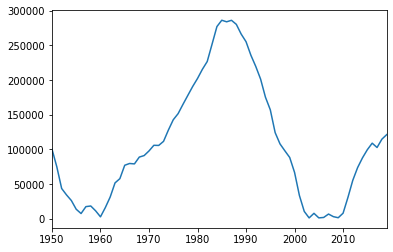

In [0]:
#Plotting random row
d.iloc[100].plot()

In [0]:
df = pd.concat([df,d], sort=False)

In [0]:
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Area,City,Country,If 2020> capacity,Latitude,Longitude,existing road/flyover capacity,existing road/flyover construction year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,Yelahanka,Bengaluru,India,Yes,12.97194,77.59369,80000.0,2015.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,Hebbala,Bengaluru,India,No,12.97194,77.59369,150000.0,2018.0
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294036.0,290001.0,301151.0,273888.0,256100.0,295592.0,318038.0,316093.0,318313.0,320637.0,329207.0,320229.0,245803.0,208867.0,106914.0,35072.0,72876.0,159768.0,237807.0,321077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33797.0,34759.0,36360.0,38856.0,40906.0,43035.0,43650.0,46466.0,47951.0,50191.0,51501.0,53614.0,53159.0,53837.0,54148.0,55447.0,55541.0,56235.0,56693.0,58672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.to_csv("SampleTrafficData.csv")

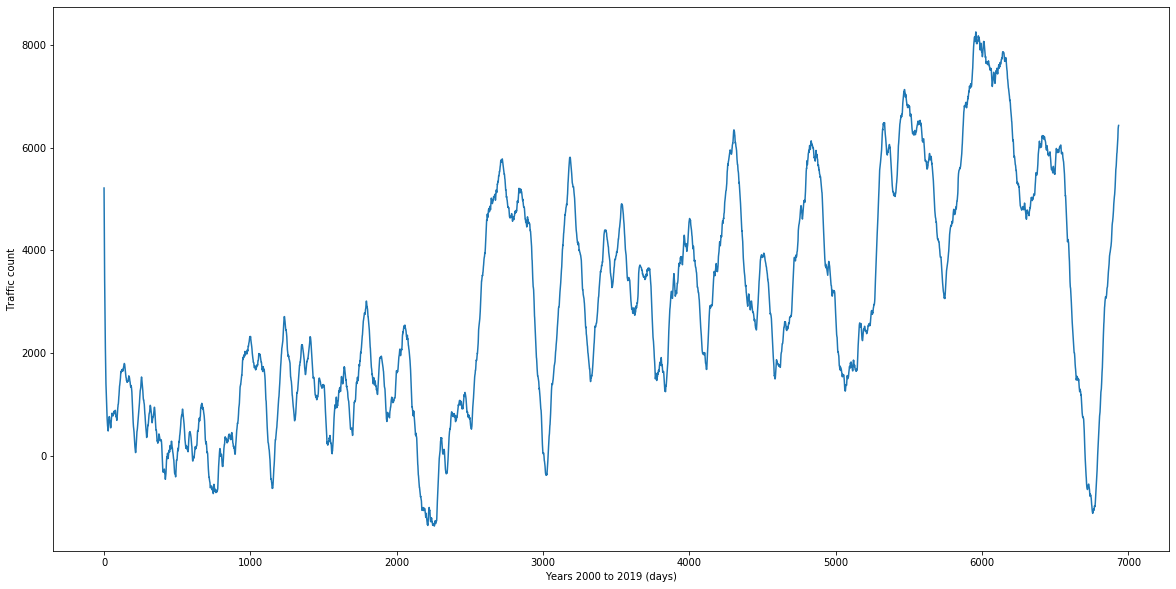

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0


 
  span = np.random.random_sample()*10

  time = []
  value = []

  #years = [x for x in range((endYear-startYear)*365)]


  for i in range((endYear-startYear)*365):
    #for j in range(365):
    x = float(startYear+i) * span / points - 0.5 * span

    y = base + noise.pnoise1(x , octaves) * amplitude
    #print(x,y, end= '\n')
    
    time.append(n)
    n+=1
    #span*=1.2
    base*=slope
    y = y + (i*slope)
    value.append(int(y))


    #base*=slope
  plt.figure(figsize=(20,10))
  plt.plot(time,value)
  plt.xlabel("Years 2000 to 2019 (days)")
  plt.ylabel("Traffic count")

  minValue = min(value)
  value = np.array(value)+np.abs(minValue) + np.random.randint(50)

 

  return  np.array(value), np.array(time)



data ,time = createData(1000,startYear=2000,endYear=2019,plotGraph=True,printLog=True)


Text(0, 0.5, 'Traffic count')

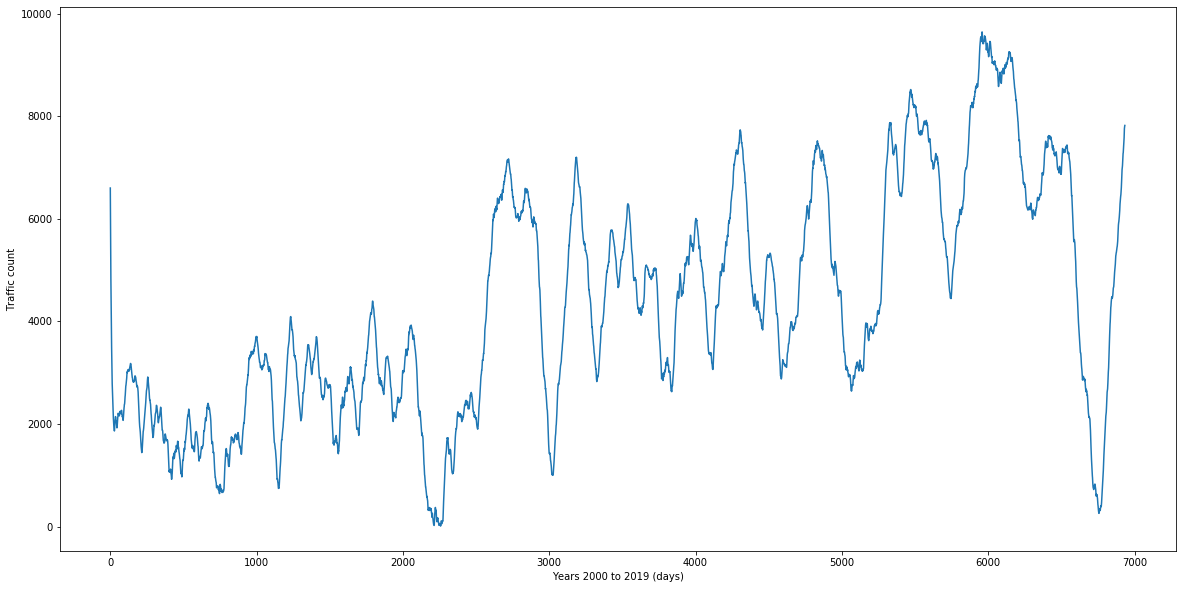

In [0]:
plt.figure(figsize=(20,10))
plt.plot(time,data)
plt.xlabel("Years 2000 to 2019 (days)")
plt.ylabel("Traffic count")